# Key concepts in Jaxley

In this tutorial, we will introduce you to the basic concepts of Jaxley.
You will learn about:

- Modules (e.g., Cell, Network,...)
    - nodes
    - edges
- Views
    - Groups
- Channels
- Synapses

Here is a code snippet which you will learn to understand in this tutorial:
```python
import jaxley as jx
from jaxley.channels import Na, K, Leak
from jaxley.synapses import IonotropicSynapse
from jaxley.connect import connect
import matplotlib.pyplot as plt
import numpy as np


# Assembling different Modules into a Network
comp = jx.Compartment()
branch = jx.Branch(comp, ncomp=1)
cell = jx.Cell(branch, parents=[-1, 0, 0])
net = jx.Network([cell]*3)

# Navigating and inspecting the Modules using Views
cell0 = net.cell(0)
cell0.nodes

# How to group together parts of Modules
net.cell(1).add_to_group("cell1")

# inserting channels in the membrane
with net.cell(0) as cell0:
    cell0.insert(Na())
    cell0.insert(K())

# connecting two cells using a Synapse
pre_comp = cell0.branch(1).comp(0)
post_comp = net.cell1.branch(0).comp(0)

connect(pre_comp, post_comp)
```

First, we import the relevant libraries:

In [1]:
from jax import config
config.update("jax_enable_x64", True)
config.update("jax_platform_name", "cpu")

import jaxley as jx
from jaxley.channels import Na, K, Leak
from jaxley.synapses import IonotropicSynapse
from jaxley.connect import connect
import matplotlib.pyplot as plt
import numpy as np

## Modules

In Jaxley, we heavily rely on the concept of Modules to build biophyiscal models of neural systems at various scales.
Jaxley implements four types of Modules:
- `Compartment`  
- `Branch`  
- `Cell`  
- `Network`  

Modules can be connected together to build increasingly detailed and complex models. `Compartment` -> `Branch` -> `Cell` -> `Network`.

`Compartment`s are the atoms of biophysical models in Jaxley. All mechanisms and synaptic connections live on the level of `Compartment`s and can already be simulated using `jx.integrate` on their own. Everything you do in Jaxley starts with a `Compartment`.

In [2]:
comp = jx.Compartment() # single compartment model.

Multiple `Compartments` can be connected together to form longer, linear cables, which we call `Branch`es and are equivalent to sections in `NEURON`.

In [3]:
ncomp = 4
branch = jx.Branch([comp] * ncomp)

In order to construct cell morphologies in Jaxley, multiple `Branches` can to be connected together as a `Cell`:

In [4]:
# -1 indicates that the first branch has no parent branch.
# The other two branches both have the 0-eth branch as their parent.
parents = [-1, 0, 0]
cell = jx.Cell([branch] * len(parents), parents)

Finally, several `Cell`s can be grouped together to form a `Network`, which can than be connected together using `Synpase`s.

In [5]:
ncells = 2
net = jx.Network([cell]*ncells)

net.shape # shows you the num_cells, num_branches, num_comps

(2, 6, 24)

Every module tracks information about its current state and parameters in two Dataframes called `nodes` and `edges`.
`nodes` contains all the information that we associate with compartments in the model (each row corresponds to one compartment) and `edges` tracks all the information relevant to synapses.

This means that you can easily keep track of the current state of your `Module` and how it changes at all times.

In [6]:
net.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0
1,0,0,1,10.0,1.0,5000.0,1.0,-70.0,0,0,1,0
2,0,0,2,10.0,1.0,5000.0,1.0,-70.0,0,0,2,0
3,0,0,3,10.0,1.0,5000.0,1.0,-70.0,0,0,3,0
4,0,1,0,10.0,1.0,5000.0,1.0,-70.0,0,1,4,0
5,0,1,1,10.0,1.0,5000.0,1.0,-70.0,0,1,5,0
6,0,1,2,10.0,1.0,5000.0,1.0,-70.0,0,1,6,0
7,0,1,3,10.0,1.0,5000.0,1.0,-70.0,0,1,7,0
8,0,2,0,10.0,1.0,5000.0,1.0,-70.0,0,2,8,0
9,0,2,1,10.0,1.0,5000.0,1.0,-70.0,0,2,9,0


In [7]:
net.edges.head() # this is currently empty since we have not made any connections yet

,global_edge_index,pre_global_comp_index,post_global_comp_index,pre_locs,post_locs,type,type_ind


## Views

Since these `Module`s can become very complex, Jaxley utilizes so called `View`s to make working with `Module`s easy and intuitive. 

The simplest way to navigate Modules is by navigating them via the hierarchy that we introduced above. A `View` is what you get when you index into the module. For example, for a `Network`:

In [8]:
net.cell(0)

View with 0 different channels. Use `.nodes` for details.

Views behave very similarly to `Module`s, i.e. the `cell(0)` (the 0th cell of the network) behaves like the `cell` we instantiated earlier. As such, `cell(0)` also has a `nodes` attribute, which keeps track of it's part of the network:

In [9]:
net.cell(0).nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0
1,0,0,1,10.0,1.0,5000.0,1.0,-70.0,0,0,1,0
2,0,0,2,10.0,1.0,5000.0,1.0,-70.0,0,0,2,0
3,0,0,3,10.0,1.0,5000.0,1.0,-70.0,0,0,3,0
4,0,1,0,10.0,1.0,5000.0,1.0,-70.0,0,1,4,0
5,0,1,1,10.0,1.0,5000.0,1.0,-70.0,0,1,5,0
6,0,1,2,10.0,1.0,5000.0,1.0,-70.0,0,1,6,0
7,0,1,3,10.0,1.0,5000.0,1.0,-70.0,0,1,7,0
8,0,2,0,10.0,1.0,5000.0,1.0,-70.0,0,2,8,0
9,0,2,1,10.0,1.0,5000.0,1.0,-70.0,0,2,9,0


Let's use `View`s to visualize only parts of the `Network`. Before we do that, we create x, y, and z coordinates for the `Network`:

In [10]:
# Compute xyz coordinates of the cells.
net.compute_xyz()

# Move cells (since they are placed on top of each other by default).
net.cell(0).move(y=30)

We can now visualize the entire `net` (i.e., the entire `Module`) with the `.vis()` method...

<Axes: >

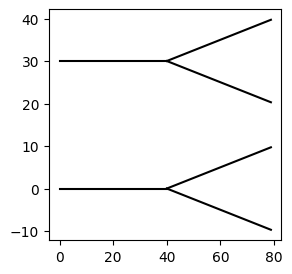

In [11]:
# We can use the vis function to visualize Modules.
fig, ax = plt.subplots(1, 1, figsize=(3,3))
net.vis(ax=ax)

...but we can also create a `View` to visualize only parts of the `net`:

<Axes: >

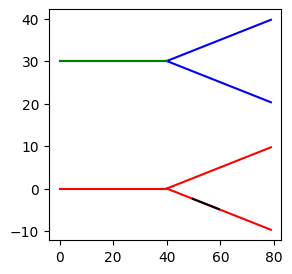

In [13]:
# ... and Views
fig, ax = plt.subplots(1,1, figsize=(3,3))
net.cell(0).vis(ax=ax, color="blue") # View of the 0th cell of the network
net.cell(1).vis(ax=ax, color="red") # View of the 1st cell of the network

net.cell(0).branch(0).vis(ax=ax, color="green") # View of the 1st branch of the 0th cell of the network
net.cell(1).branch(1).comp(1).vis(ax=ax, color="black", type="line") # View of the 0th comp of the 1st branch of the 0th cell of the network

### How to create `View`s

Above, we used `net.cell(0)` to generate a `View` of the 0-eth cell. `Jaxley` supports many ways of performing such indexing:

In [14]:
# several types of indices are supported (lists, ranges, ...)
net.cell([0,1]).branch("all").comp(0)  # View of all 0th comps of all branches of cell 0 and 1

branch.loc(0.1)  # Equivalent to `NEURON`s `loc`. Assumes branches are continuous from 0-1.

net[0,0,0]  # Modules/Views can also be lazily indexed

cell0 = net.cell(0)  # Views can be assigned to variables and only track the parts of the Module they belong to
cell0.branch(1).comp(0)  # Views can be continually indexed

View with 0 different channels. Use `.nodes` for details.

In [15]:
cell0.nodes

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param
0,0,0,0,10.0,1.0,5000.0,1.0,-70.0,0,0,0,0
1,0,0,1,10.0,1.0,5000.0,1.0,-70.0,0,0,1,0
2,0,0,2,10.0,1.0,5000.0,1.0,-70.0,0,0,2,0
3,0,0,3,10.0,1.0,5000.0,1.0,-70.0,0,0,3,0
4,0,1,0,10.0,1.0,5000.0,1.0,-70.0,0,1,4,0
5,0,1,1,10.0,1.0,5000.0,1.0,-70.0,0,1,5,0
6,0,1,2,10.0,1.0,5000.0,1.0,-70.0,0,1,6,0
7,0,1,3,10.0,1.0,5000.0,1.0,-70.0,0,1,7,0
8,0,2,0,10.0,1.0,5000.0,1.0,-70.0,0,2,8,0
9,0,2,1,10.0,1.0,5000.0,1.0,-70.0,0,2,9,0


In [16]:
net.shape

(2, 6, 24)

_Note: In case you need even more flexibility in how you select parts of a Module, Jaxley provides a `select` method, to give full control over the exact parts of the `nodes` and `edges` that are part of a `View`. On examples of how this can be used, see the [tutorial on advanced indexing](https://jaxley.readthedocs.io/en/latest/tutorials/09_advanced_indexing.html)._

You can also iterate over networks, cells, and branches:

In [17]:
# We set the radiuses to random values...
radiuses = np.random.rand((24))
net.set("radius", radiuses)

# ...and then we set the length to 100.0 um if the radius is >0.5.
for cell in net:
    for branch in cell:
        for comp in branch:
            if comp.nodes.iloc[0]["radius"] > 0.5:
                comp.set("length", 100.0)

# Show the first five compartments:
net.nodes[["radius", "length"]][:5]

,radius,length
0,0.537066,100.0
1,0.050138,10.0
2,0.913129,100.0
3,0.874596,100.0
4,0.048903,10.0


Finally, you can also use `View`s in a context manager:

In [18]:
with net.cell(0).branch(0) as branch0:
    branch0.set("radius", 2.0)
    branch0.set("length", 2.5)
    
# Show the first five compartments.
net.nodes[["radius", "length"]][:5]

,radius,length
0,2.000000,2.5
1,2.000000,2.5
2,2.000000,2.5
3,2.000000,2.5
4,0.048903,10.0


## Channels

The `Module`s that we have created above will not do anything interesting, since by default Jaxley initializes them without any mechanisms in the membrane. To change this, we have to insert channels into the membrane. For this purpose `Jaxley` implements `Channel`s that can be inserted into any compartment using the `insert` method of a `Module` or a `View`:

In [19]:
# insert a Leak channel into all compartments in the Module.
net.insert(Leak())
net.nodes.head() # Channel parameters are now also added to `nodes`.

,local_cell_index,local_branch_index,local_comp_index,length,radius,axial_resistivity,capacitance,v,global_cell_index,global_branch_index,global_comp_index,controlled_by_param,Leak,Leak_gLeak,Leak_eLeak
0,0,0,0,2.5,2.000000,5000.0,1.0,-70.0,0,0,0,0,True,0.0001,-70.0
1,0,0,1,2.5,2.000000,5000.0,1.0,-70.0,0,0,1,0,True,0.0001,-70.0
2,0,0,2,2.5,2.000000,5000.0,1.0,-70.0,0,0,2,0,True,0.0001,-70.0
3,0,0,3,2.5,2.000000,5000.0,1.0,-70.0,0,0,3,0,True,0.0001,-70.0
4,0,1,0,10.0,0.048903,5000.0,1.0,-70.0,0,1,4,0,True,0.0001,-70.0


This is also were `View`s come in handy, as they allow to easily target the insertion of channels to specific compartments.

In [20]:
# inserting several channels into parts of the network
with net.cell(0) as cell0:
    cell0.insert(Na())
    cell0.insert(K())

# # The above is equivalent to:
# net.cell(0).insert(Na())
# net.cell(0).insert(K())

# K and Na channels were only insert into cell 0
net.cell("all").branch(0).comp(0).nodes[["global_cell_index", "Na", "K", "Leak"]]

,global_cell_index,Na,K,Leak
0,0,True,True,True
12,1,False,False,True


## Synapses

To connect different cells together, Jaxley implements a `connect` method, that can be used to couple 2 compartments together using a `Synapse`. Synapses in Jaxley work only on the compartment level, that means to be able to connect two cells, you need to specify the exact compartments on a given cell to make the connections between. Below is an example of this:

In [21]:
# connecting two cells using a Synapse
pre_comp = cell0.branch(1).comp(0)
post_comp = net.cell(1).branch(0).comp(0)

connect(pre_comp, post_comp, IonotropicSynapse())

net.edges

,global_edge_index,pre_global_comp_index,post_global_comp_index,type,type_ind,pre_locs,post_locs,IonotropicSynapse_gS,IonotropicSynapse_e_syn,IonotropicSynapse_k_minus,IonotropicSynapse_s,controlled_by_param
0,0,4,12,IonotropicSynapse,0,0.125,0.125,0.0001,0.0,0.025,0.2,0


As you can see above, now the `edges` dataframe is also updated with the information of the newly added synapse. 

Congrats! You should now have an intuitive understand of how to use Jaxley's API to construct, navigate and manipulate neuron models.